In [42]:

import pandas as pd

# Import do dataFrame modelo Departamento Pessoal que criar uma modelo em apredizagem de máquina que volta analises de dados relevantes para a tomada de politicas para ajudar na retenção de profissionais.

In [43]:
base = pd.read_csv(r"C:\Users\jean_\Downloads\material de apoio\bases\modelagem_rh.csv")
print(base.shape)

(14999, 10)


In [44]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 0 para que está na empresa.
# 1 para que saiu da empresa.

In [45]:
base.saiu.value_counts()

saiu
0    11428
1     3571
Name: count, dtype: int64

In [46]:
base.saiu.value_counts()/len(base)*100

saiu
0    76.191746
1    23.808254
Name: count, dtype: float64

In [47]:
import matplotlib.pyplot as plt

In [48]:
%matplotlib inline

<Axes: xlabel='saiu'>

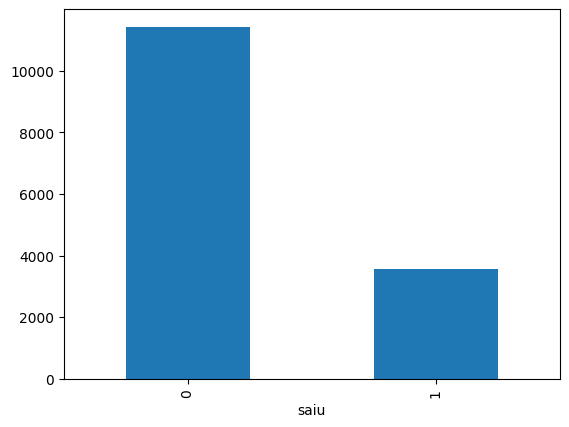

In [49]:
base.saiu.value_counts().plot(kind='bar')

([<matplotlib.axis.XTick at 0x1e21fee7510>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

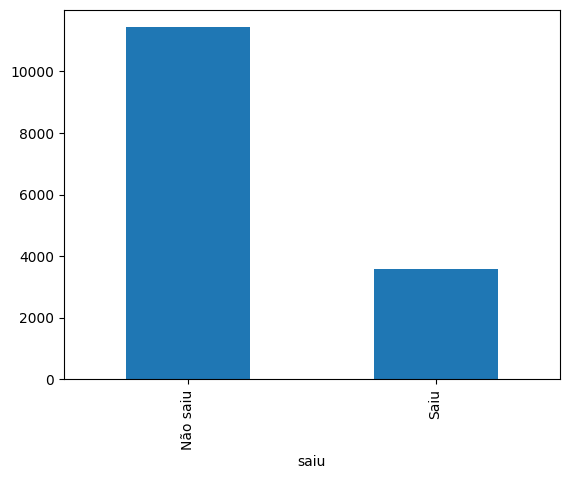

In [50]:
base.saiu.value_counts().plot(kind='bar')
plt.xticks((0,1),['Não saiu','Saiu'])

In [51]:
pd.crosstab(base.departamento, base.saiu)

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [52]:
valores = pd.crosstab(base.departamento, base.saiu)

In [53]:
soma = valores.sum(axis=1)

In [54]:
soma

departamento
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [55]:
valores.divide(soma, axis=0)*100

saiu,0,1
departamento,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


In [56]:
pd.crosstab(base.salario, base.saiu)

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [57]:
valores_salario = pd.crosstab(base.salario, base.saiu)
soma_salario = valores_salario.sum(axis=1)

In [58]:
valores_salario.divide(soma_salario, axis=0)*100

saiu,0,1
salario,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [59]:
porcentagem_salario = valores_salario.divide(soma_salario, axis=0)*100

<Axes: xlabel='salario'>

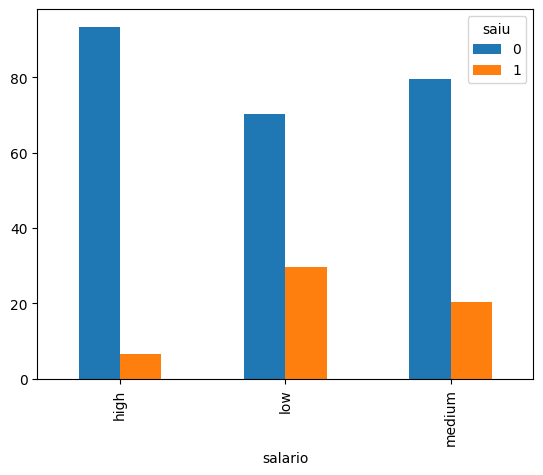

In [60]:
porcentagem_salario.plot(kind="bar")


In [61]:
# porcentagem_salario.xticks(('high', 'low', 'medium'), ['Alto','Baixo','Médio'])

<Axes: xlabel='salario'>

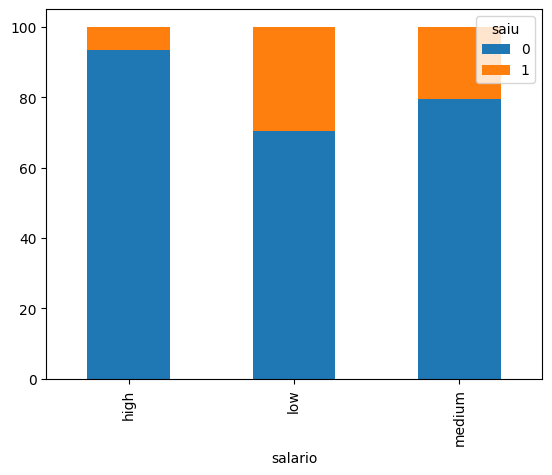

In [62]:
porcentagem_salario.plot(kind="bar", stacked=True)


In [63]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [64]:
base.isnull().sum()

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [65]:
base.nivel_satisfacao.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Name: nivel_satisfacao, Length: 14999, dtype: bool

In [66]:
base.loc[base.nivel_satisfacao.isnull(), 'nivel_satisfacao'] = \
base.nivel_satisfacao.mean()

In [67]:
base.isnull().sum()

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

In [68]:
base.max()

nivel_satisfacao            1.0
ult_avaliacao               1.0
num_projetos                  7
media_horas_mes             310
tempo_empresa                10
aci_trabalho                  1
saiu                          1
promocao_ult_5anos            1
departamento          technical
salario                  medium
dtype: object

In [69]:
base = pd.get_dummies(base, drop_first=True)

In [70]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [71]:
base.max()

nivel_satisfacao             1.0
ult_avaliacao                1.0
num_projetos                   7
media_horas_mes              310
tempo_empresa                 10
aci_trabalho                   1
saiu                           1
promocao_ult_5anos             1
departamento_RandD          True
departamento_accounting     True
departamento_hr             True
departamento_management     True
departamento_marketing      True
departamento_product_mng    True
departamento_sales          True
departamento_support        True
departamento_technical      True
salario_low                 True
salario_medium              True
dtype: object

In [72]:
pd.DataFrame([base.max(), base.min()], index=['max', 'min'])

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7,310,10,1,1,1,True,True,True,True,True,True,True,True,True,True,True
min,0.09,0.36,2,96,2,0,0,0,False,False,False,False,False,False,False,False,False,False,False


In [73]:
pd.DataFrame([base.max(), base.min()], index=['max', 'min']).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7,2
media_horas_mes,310,96
tempo_empresa,10,2
aci_trabalho,1,0
saiu,1,0
promocao_ult_5anos,1,0
departamento_RandD,True,False
departamento_accounting,True,False


In [74]:
from sklearn.preprocessing import minmax_scale

In [75]:
x=base.values

In [76]:
x

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [77]:
from sklearn.preprocessing import MinMaxScaler


minmax = MinMaxScaler()

In [78]:
x_scaled = minmax.fit_transform(x)

In [79]:
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [80]:
base = pd.DataFrame(x_scaled, columns=base.columns)

In [81]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [82]:
pd.DataFrame([base.max(), base.min()], index=['max', 'min']).T


,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


In [83]:
cols = list(base.columns)

In [84]:
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'saiu',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [85]:
cols.remove('saiu')

In [86]:
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [87]:
x = base [cols]

In [88]:
y = base ['saiu']

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

In [91]:
from sklearn.model_selection import train_test_split

# Separação dos dados para treino 20% dos dados.

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [93]:
x_train


,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
5726,0.923077,0.625000,0.6,0.425234,0.125,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6402,0.780220,0.765625,0.4,0.200935,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4156,0.714286,0.484375,0.6,0.205607,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11793,0.747253,0.718750,0.2,0.266355,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9886,0.648352,0.218750,0.4,0.327103,0.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.000000,0.750000,0.8,0.757009,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8884,0.450549,0.281250,0.6,0.359813,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6776,0.505495,0.546875,0.2,0.537383,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10810,0.648352,0.625000,0.2,0.766355,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [94]:
print(x_train.shape, x_test.shape)

(11999, 18) (3000, 18)


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [96]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
predicted = knn.predict(x_test)

In [98]:
accuracy_score (predicted, y_test )

0.951

In [99]:
confusion_matrix(predicted, y_test)

array([[2181,   48],
       [  99,  672]], dtype=int64)

In [100]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [101]:
accuracy_score (tree.predict(x_test), y_test)

0.984

In [102]:
confusion_matrix(tree.predict(x_test,), y_test)

array([[2256,   24],
       [  24,  696]], dtype=int64)

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
pontos = cross_val_score(knn, x, y, cv=5, scoring='accuracy')

In [105]:
pontos.mean ()


0.9481967767033457

In [106]:
pontos.std()

0.013597545694866528

In [107]:
pontos_tree = cross_val_score(tree, x, y, cv=5, scoring='accuracy')

In [108]:
pontos_tree.mean ()

0.9741313771257085

In [109]:
pontos_tree.std()

0.009099219778022003

In [110]:
tree.feature_importances_

array([4.92161532e-01, 1.44748131e-01, 1.12273786e-01, 8.42636633e-02,
       1.46248467e-01, 6.43321127e-04, 0.00000000e+00, 5.79708465e-04,
       6.33921109e-04, 3.97423431e-04, 6.22367783e-04, 4.63898537e-04,
       3.94343685e-04, 1.89512068e-03, 3.64835209e-03, 2.40244504e-03,
       5.41036564e-03, 3.21315335e-03])

<Axes: >

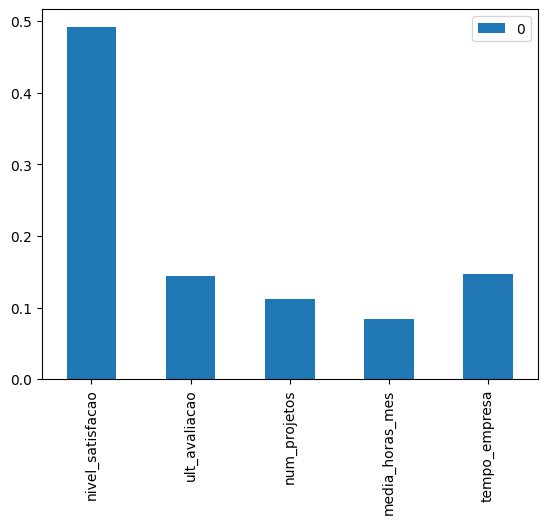

In [111]:
pd.DataFrame(tree.feature_importances_, index=x.columns) [:5].plot(kind='bar')

In [112]:
import pickle

# Treina o modelo

In [113]:
tree.fit(x,y)

DecisionTreeClassifier()

# Salvar o modelo

In [114]:
pickle.dump(tree, open('modelo_rh.pickle', 'wb'))

# Carrega o modelo.

In [115]:
tree_salva = pickle.load(open('modelo_rh.pickle', 'rb'))

In [116]:
tree_salva

DecisionTreeClassifier()

# Testa o modelo carregado com uma quantidade de dados.

In [117]:
tree_salva.predict(x_test)

array([1., 0., 0., ..., 0., 1., 0.])